In [1]:

import matplotlib.pyplot as plt

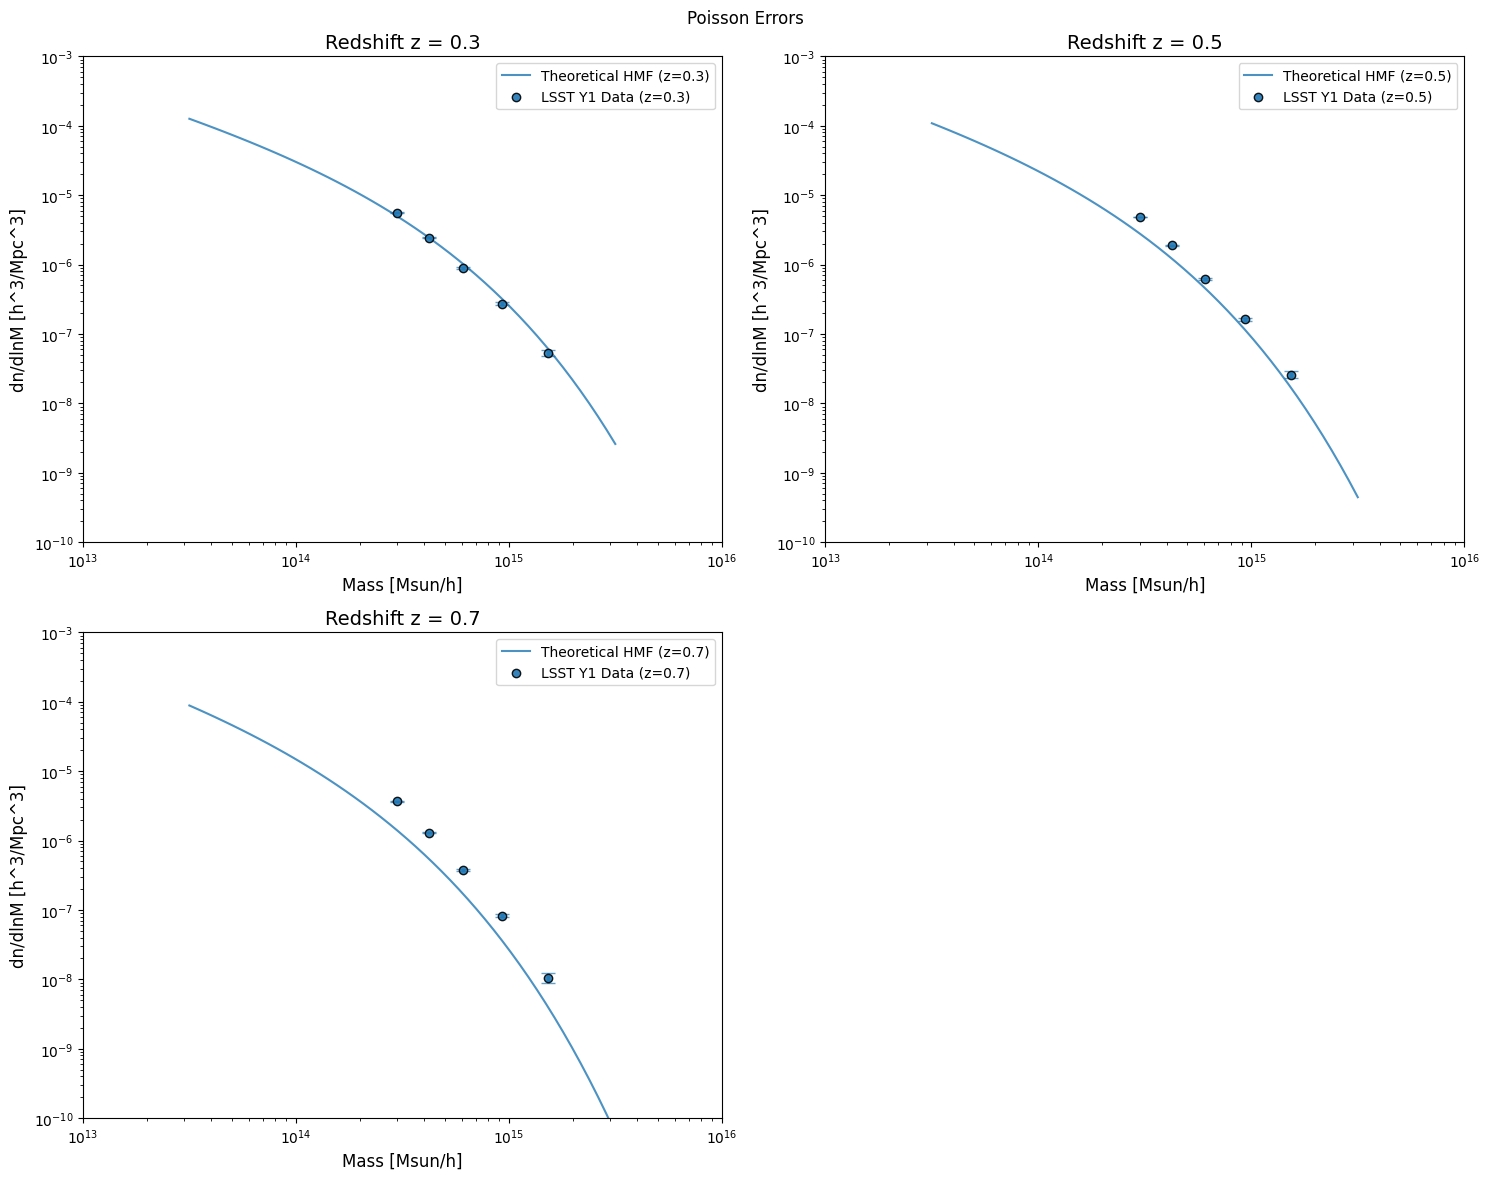

In [2]:
lsst_data_string = """0 6.567915e+03
1 3.011662e+03
2 1.298958e+03
3 4.599047e+02
4 9.054683e+01
5 9.438942e+03
6 3.931948e+03
7 1.509797e+03
8 4.587280e+02
9 7.312548e+01
10 8.775993e+03
11 3.279941e+03
12 1.106261e+03
13 2.841466e+02
14 3.602026e+01"""
    
lsst_analysis = obs.LSSTClusterAnalysis()

indices, values = lsst_analysis.parse_lsst_data(lsst_data_string)
cluster_counts = lsst_analysis.extract_cluster_counts(values)


for i, z in enumerate(lsst_analysis.z_centers):
    
    for j, richness in enumerate(lsst_analysis.richness_centers):
        mass = lsst_analysis.mass_centers[i, j]
        
number_density = lsst_analysis.counts_to_number_density(cluster_counts)

# Calculate uncertainties
poisson_errors, fractional_errors = lsst_analysis.calculate_uncertainties(cluster_counts)

lsst_hmf_data = lsst_analysis.convert_to_hmf(number_density, poisson_errors)

fig2 = obs.plot_comparison_with_theory(lsst_analysis, lsst_hmf_data)

plt.show()